/tmp/ipykernel_24455/1660927929.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['x_order'] = range(0, len(df_22))
/tmp/ipykernel_24455/1660927929.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['x_order'] = range(0, len(df_21))
/tmp/ipykernel_24455/1660927929.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

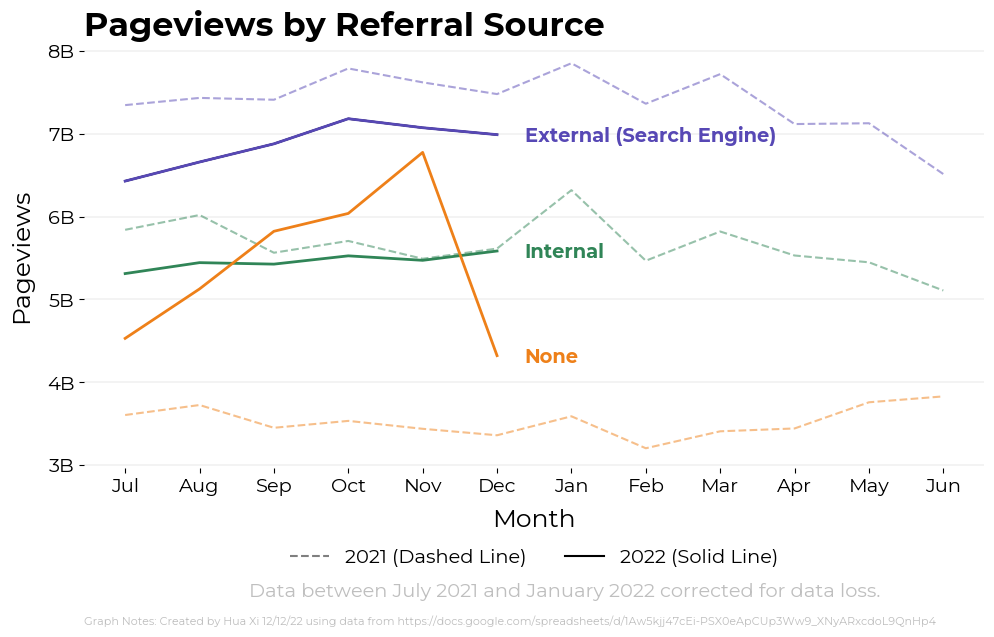

In [2]:
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager
import os

#---PROMPT FOR INPUT---
outfile_name = "Referral_Source.png"
note = " "

#---READ IN DATA--
#get current path
home_dir = os.getcwd()

df = pd.read_csv(home_dir + '/data/referral_source.csv')

#display top rows for preview
#df.head()

#---CLEAN DATA--
#look at data types
#print(df.active_editors.dtype)
#print(df.month.dtype)

#convert string to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values(by='timestamp')

#rename columns
df = df.rename(columns={'referer_class':'referrer'})
df = df.rename(columns={'data loss %':'data_loss_percent'})

#remove commas
df["sum_view_count"] = df["sum_view_count"].str.replace(",","")
df["corrected_pv"] = df["corrected_pv"].str.replace(",","")

#convert to type
df['sum_view_count'] = df['sum_view_count'].astype(str).astype(float)
df['corrected_pv'] = df['corrected_pv'].astype(str).astype(float)
df['referrer'] = df['referrer'].astype(str)

#add column
df['month'] = pd.DatetimeIndex(df['timestamp']).month

#---BREAK DATA INTO SUBSETS
#long to wide
grouped = df.groupby(['timestamp','month','referrer'])['corrected_pv'].sum()
grouped = grouped.unstack('referrer').loc[:,:]
grouped = grouped.reset_index()
grouped = grouped.rename_axis(None, axis=1)
grouped = grouped.rename(columns={'external (search engine)':'external'})
#2022 data
df_22 = grouped[grouped["timestamp"].isin(pd.date_range("2022-07-01", "2023-06-01"))]
df_22.sort_values(by='timestamp')
df_22['x_order'] = range(0, len(df_22))
#2021 data
df_21 = grouped[grouped["timestamp"].isin(pd.date_range("2021-07-01", "2022-06-01"))]
df_21.sort_values(by='timestamp')
df_21['x_order'] = range(0, len(df_21))
#subset to highlight the last two months
#mom_highlight = pd.concat([df.iloc[-2,:],df.iloc[-1,:]],axis=1).T

#subsets for plotting data loss
#by source
external = df[df["referrer"] == "external (search engine)"]
internal = df[df["referrer"] == "internal"]
none = df[df["referrer"] == "none"]
#break up by time period 
external_dataloss = external[external["timestamp"].isin(pd.date_range("2021-07-01", "2022-02-01"))]
external_dataloss.sort_values(by='timestamp')
external_dataloss['x_order'] = range(0, len(external_dataloss))
internal_dataloss = internal[internal["timestamp"].isin(pd.date_range("2021-07-01", "2022-02-01"))]
internal_dataloss.sort_values(by='timestamp')
internal_dataloss['x_order'] = range(0, len(internal_dataloss))
none_dataloss = none[none["timestamp"].isin(pd.date_range("2021-07-01", "2022-02-01"))]
none_dataloss.sort_values(by='timestamp')
none_dataloss['x_order'] = range(0, len(none_dataloss))

#---ADJUST PLOT SIZE---
plt.figure(figsize=(12, 7))

#---PREPARE TO PLOT
#create a dictionary for colors
wmf_colors = {'black75':'#404040','black50':'#7F7F7F','black25':'#BFBFBF','base80':'#eaecf0','base70':'#c8ccd1','purple':'#5748B5','orange':'#EE8019','red':'#970302','pink':'#E679A6','purple':'#5748B5','blue':'#0E65C0','brightblue':'#049DFF','brightbluelight':'#C0E6FF','yellow':'#F0BC00','green':'#308557','brightgreen':'#71D1B3'}

#add Montserrat file by file (quick fix)
#font_montserrat = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Regular.ttf")
#font_montserrat_bold = matplotlib.font_manager.FontProperties(fname="/srv/home/xihua/Key_Product_Metrics/fonts/Montserrat/static/Montserrat-Bold.ttf")

font_dirs = [home_dir + "/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

#check added fonts
#result = custom_font_manager.get_font_names()
#print(result)

#add grid lines
plt.grid(axis = 'y', zorder=-1, color = wmf_colors['black25'], linewidth = 0.25)
#linestyle = '--'

#---PLOT---
'''
plt.fill_between(external_dataloss.x_order, external_dataloss.sum_view_count, external_dataloss.corrected_pv,
	color=wmf_colors['purple'],
	edgecolor=wmf_colors['purple'],
	alpha=0.25,
	label='_nolegend_',
	zorder=5)
plt.fill_between(internal_dataloss.x_order, internal_dataloss.sum_view_count, internal_dataloss.corrected_pv,
	color=wmf_colors['green'],
	edgecolor=wmf_colors['green'],
	alpha=0.25,
	label='_nolegend_',
	zorder=5)
plt.fill_between(none_dataloss.x_order, none_dataloss.sum_view_count, none_dataloss.corrected_pv,
	color=wmf_colors['orange'],
	edgecolor=wmf_colors['orange'],
	alpha=0.25,
	label='_nolegend_',
	zorder=5)
'''
#2022 data
#df_22.plot(x="timestamp", y=["external", "internal","none"],#
plt.plot(df_22.x_order, df_22.external, label='_nolegend_', color=wmf_colors['purple'],linewidth=2,zorder=8)
plt.plot(df_22.x_order, df_22.internal, label='_nolegend_', color=wmf_colors['green'],linewidth=2,zorder=8)
plt.plot(df_22.x_order, df_22.none, label='_nolegend_', color=wmf_colors['orange'],linewidth=2,zorder=8)
#2021 data
plt.plot(df_21.x_order, df_21.external, label='_nolegend_', color=wmf_colors['purple'],linestyle='dashed',alpha=0.5,zorder=7)
plt.plot(df_21.x_order, df_21.internal, label='_nolegend_', color=wmf_colors['green'],linestyle='dashed',alpha=0.5,zorder=7)
plt.plot(df_21.x_order, df_21.none, label='_nolegend_', color=wmf_colors['orange'],linestyle='dashed',alpha=0.5,zorder=7)
#for legend only (hidden)
'''
plt.fill_between(df_22.x_order, df_22.external, df_22.external,
	color=wmf_colors['black25'],
	edgecolor=wmf_colors['black25'],
	label='Data Loss',
	zorder=3)
'''
plt.plot(df_22.x_order, df_22.external,
	color='black',
	label='2021 (Dashed Line)',
	linestyle='dashed',
	alpha=0.5,
	zorder=3)
plt.plot(df_22.x_order, df_22.external,
	color='black',
	label='2022 (Solid Line)',
	zorder=4)

#---FORMATTING---
#add title and labels
plt.title('Pageviews by Referral Source',font='Montserrat',weight='bold',fontsize=24,loc='left')
plt.xlabel("Month",font='Montserrat', fontsize=18, labelpad=10) #source serif pro
plt.ylabel("Pageviews",font='Montserrat', fontsize=18,labelpad=10)

#expand bottom margin
plt.subplots_adjust(bottom=0.275, left=0.1, right=0.85)

#remove bounding box
for pos in ['right', 'top', 'bottom', 'left']:
	plt.gca().spines[pos].set_visible(False)

#format y-axis labels
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:1.0f}B'.format(x*1e-9) for x in current_values])
plt.yticks(fontname = 'Montserrat',fontsize=14)

#add monthly x-axis labels
date_labels = pd.date_range("2021-07-01", "2022-06-01", freq='MS').strftime("%b").tolist()
plt.xticks(ticks=df_21['x_order'],labels=date_labels, fontsize=14,fontname = 'Montserrat')

#add legend
#plt.legend(fontsize=18)
matplotlib.rcParams['legend.fontsize'] = 14
plt.legend(frameon=False,
	loc ="upper center",
	bbox_to_anchor=(0.5, -0.15, ),
	fancybox=False, 
	shadow=False,
	ncol=4, 
	prop={"family":"Montserrat"})

#---ADD ANNOTATIONS---
#add combined annotation
def annotate(data_label, legend_label, label_color):
	plt.annotate(legend_label,
		xy = (df_22['x_order'].iat[-1],df_22[data_label].iat[-1]),
		xytext = (20,-5),
		xycoords = 'data',
		textcoords = 'offset points',
		color=label_color,
		fontsize=14,
		weight='bold',
		wrap = 'True',
		family='Montserrat')
annotate('external','External (Search Engine)',wmf_colors['purple'])
annotate('internal','Internal',wmf_colors['green'])
annotate('none','None',wmf_colors['orange'])
#data losee note
plt.figtext(0.5, 0.09, "Data between July 2021 and January 2022 corrected for data loss.", fontsize=14, family='Montserrat',color= wmf_colors['black25'],horizontalalignment='center')
#data notes
plt.figtext(0.1, 0.05, "Graph Notes: Created by Hua Xi 12/12/22 using data from https://docs.google.com/spreadsheets/d/1Aw5kjj47cEi-PSX0eApCUp3Ww9_XNyARxcdoL9QnHp4", fontsize=8, family='Montserrat',color= wmf_colors['black25'])

#---SHOW GRAPH---
save_file_name = home_dir + "/charts/" + outfile_name
plt.savefig(save_file_name, dpi=300)
plt.show()
